## Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
3. Dataset link: https://archive.ics.uci.edu/dataset/2/adult


**TASK: Create a correlation heatmap.**

In [5]:
pip install ucimlrepo

In [26]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the iris dataset from sklearn
wine = load_wine()

# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add the target variable to the dataframe
#df['target'] = iris.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


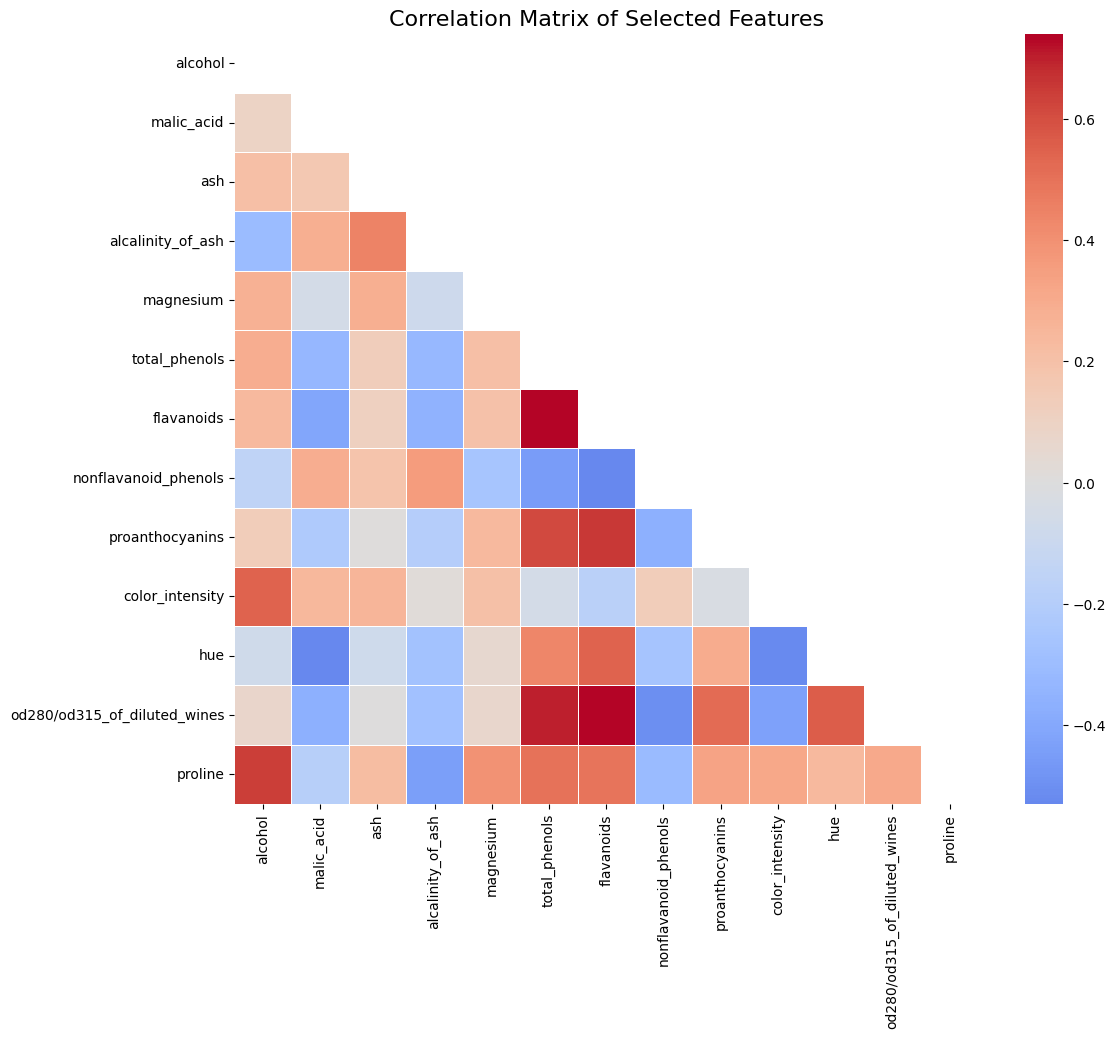

Top 5 features most correlated with 'alcohol':
proline              0.643720
color_intensity      0.546364
alcalinity_of_ash    0.310235
total_phenols        0.289101
magnesium            0.270798
Name: alcohol, dtype: float64


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


columns_of_interest = [
    'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
    'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'
]

WQ = df[columns_of_interest]


corr_matrix = WQ.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0, robust=True, linewidths=.5)
plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.show()


target_column = 'alcohol'
abs_corr = abs(corr_matrix[target_column])
top_5 = abs_corr.sort_values(ascending=False)[1:6]

print("Top 5 features most correlated with 'alcohol':")
print(top_5)


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.